In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error

In [2]:
data_path = "C:\Buffer\Jernes\Datasets\stud.csv"

In [3]:
if not os.path.exists(data_path):
    raise FileNotFoundError(f"File not found at the specified path = {data_path}")
else:
    df = pd.read_csv(data_path)
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [4]:
df.shape

(1000, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.select_dtypes(include='object').columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [7]:
df.select_dtypes(include='number').columns

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [8]:
numerical_columns = ['reading_score', 'writing_score']
catagorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch','test_preparation_course']
target_column = 'math_score'

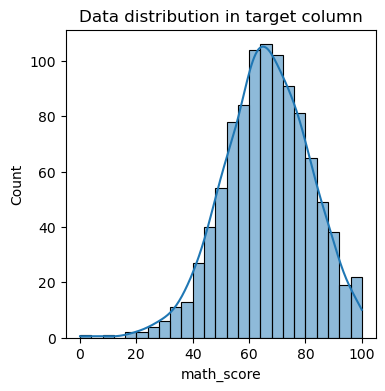

In [10]:
plt.figure(figsize=(4,4))
sns.histplot(x=target_column, data=df, kde=True)
plt.title("Data distribution in target column")
plt.show()

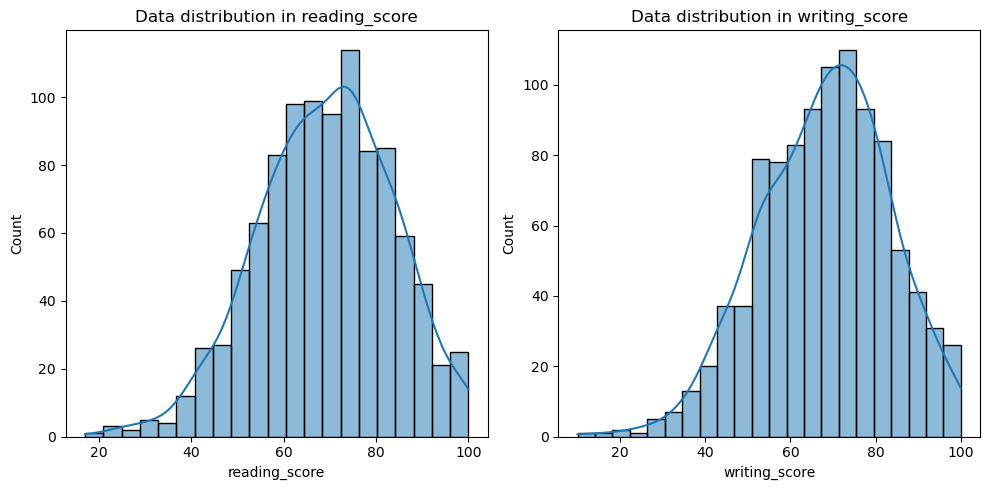

In [27]:
plt.figure(figsize=(10,5))
for i, col in enumerate(numerical_columns,1):
    plt.subplot(1,2,i)
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f"Data distribution in {col}")
plt.tight_layout()
plt.show()

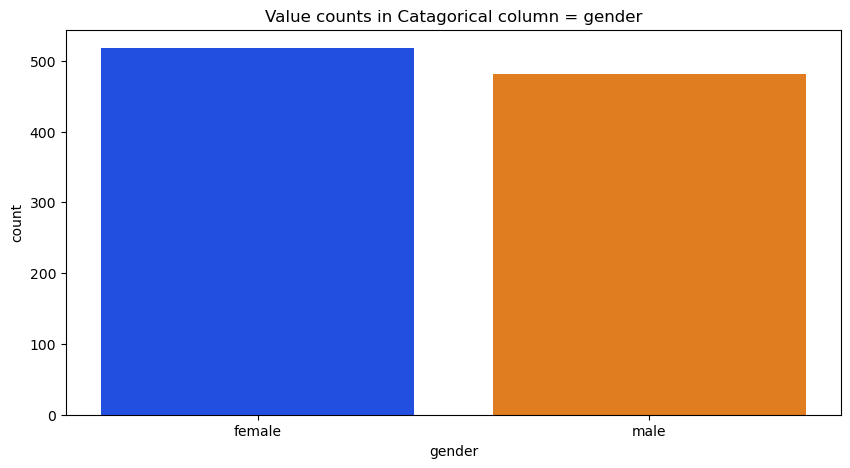

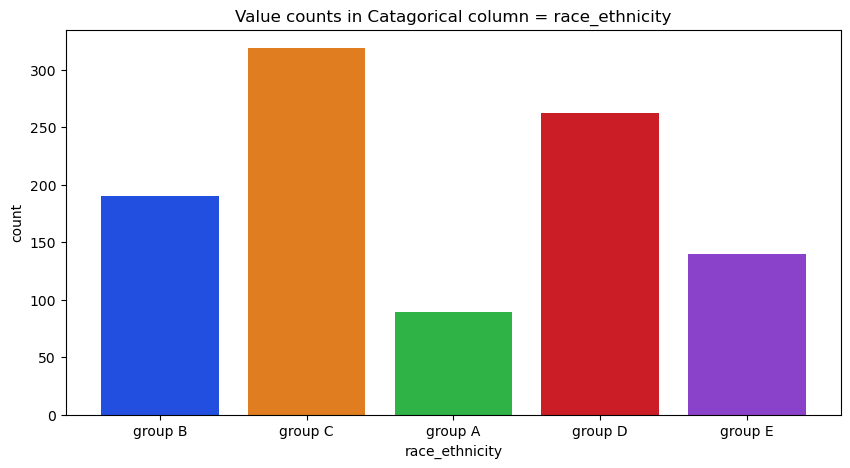

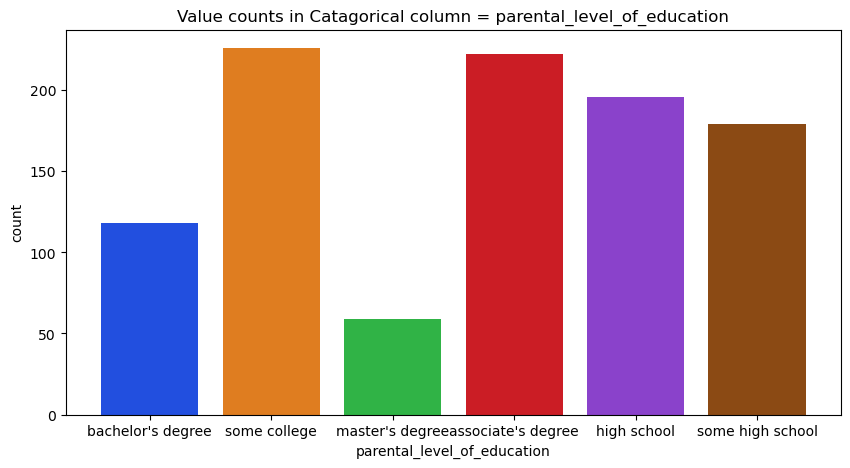

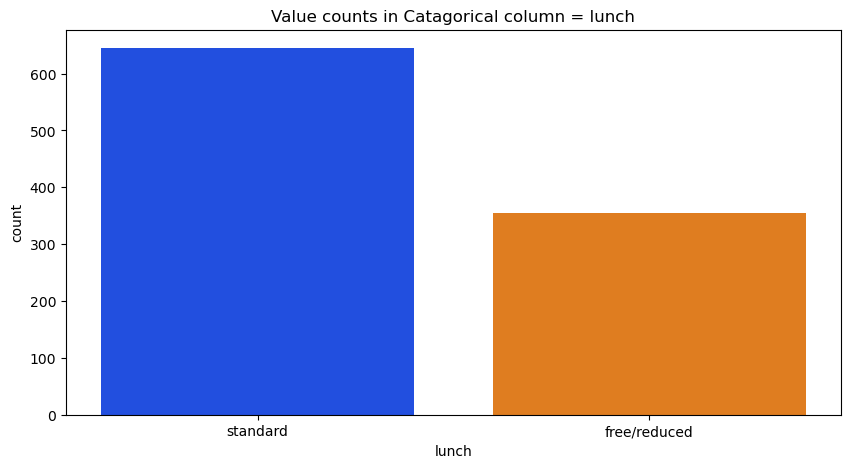

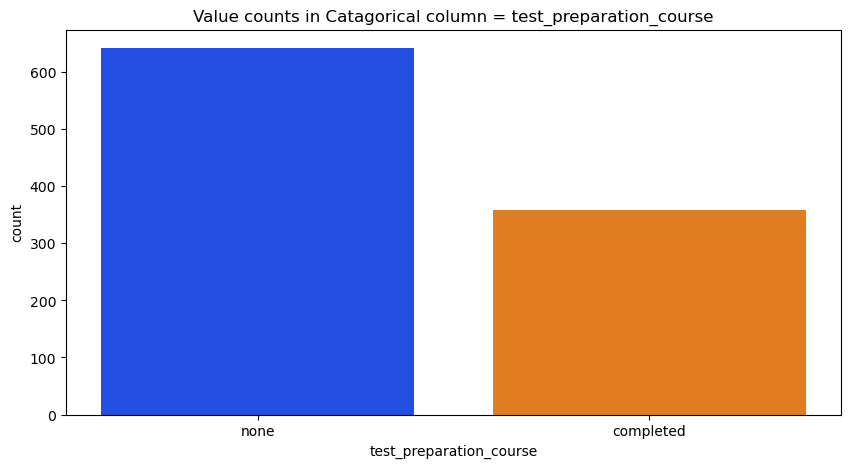

In [41]:

for col in catagorical_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df, palette='bright')
    plt.title(f"Value counts in Catagorical column = {col}")
    plt.plot()

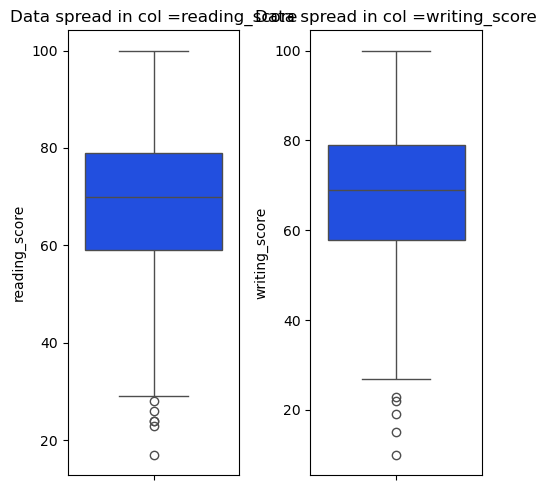

In [49]:
plt.figure(figsize=(5,5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1,2,i)
    sns.boxplot(y=col, data=df, palette='bright')
    plt.title(f"Data spread in col ={col}")
plt.tight_layout()
plt.show()

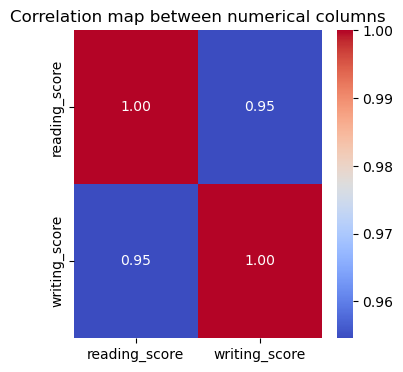

In [51]:
plt.figure(figsize=(4,4))
sns.heatmap(df[numerical_columns].corr(), cmap='coolwarm',fmt='0.2f',annot=True)
plt.title("Correlation map between numerical columns")
plt.show()

In [53]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    Lower_bound = IQR-1.5*Q1
    Upper_bound = IQR+1.5*Q3
    df[col] = df[col].clip(lower=Lower_bound,upper=Upper_bound)

In [59]:
st = StandardScaler()
df[numerical_columns] = st.fit_transform(df[numerical_columns])

In [63]:
le = LabelEncoder()
for col in catagorical_columns:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded values {dict(zip(le.classes_,le.transform(le.classes_)))}")

Encoded values {'female': 0, 'male': 1}
Encoded values {'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}
Encoded values {"associate's degree": 0, "bachelor's degree": 1, 'high school': 2, "master's degree": 3, 'some college': 4, 'some high school': 5}
Encoded values {'free/reduced': 0, 'standard': 1}
Encoded values {'completed': 0, 'none': 1}


In [71]:
x= df.drop(columns=target_column)
y=df[target_column]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.20, random_state=29)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(200, 7) (200,) (800, 7) (800,)


In [83]:
models= {
    'svr' : SVR(),
    'dt'  : DecisionTreeRegressor(),
    'rf'  : RandomForestRegressor(),
    'xgb' : XGBRegressor(),
    'lg'  : LinearRegression()
}

In [99]:
train_accuracy = {}
test_accuracy = {}

for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=4, scoring='r2')
    train_accuracy[name] = scores.mean()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    test_accuracy[name] = r2_score(y_pred, y_test)

In [103]:
df_result = pd.DataFrame({
    'model' : list(models.keys()),
    'train_accuracy':[train_accuracy[name] for name in models.keys()],
    'test_accuracy':[test_accuracy[name] for name in models.keys()]
})

df_result = df_result.sort_values(by=['test_accuracy'],ascending=False)
df_result

,model,train_accuracy,test_accuracy
4,lg,0.872636,0.840129
2,rf,0.811541,0.801381
3,xgb,0.770052,0.767407
1,dt,0.741686,0.673734
0,svr,0.501603,-0.524743
